#### Step 1: Load the python libraries

In [24]:
### Python Libraries ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#### Step 2: Load and Read the Dataset

The Breast Cancer dataset is a well-known classification dataset that contains diagnostic measurements of breast tumor cell nuclei. It includes 30 numeric features computed from digitized images of fine needle aspirates of breast masses. The goal is to classify tumors as malignant (cancerous) or benign (non-cancerous) based on these cell characteristics.

For a detailed description of the dataset, you can visit https://archive.ics.uci.edu/dataset/14/breast+cancer

In [32]:
Dataset = pd.read_csv('data/breast_cancer_data.csv')        # Load the dataset into a pandas DataFrame [1]
print(Dataset)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

#### Step 4: Check for missing values

In [33]:
# === Check for Missing Values ===
print("\nMissing values per column:")
print(Dataset.isnull().sum())    # Calculate and display the number of missing (NaN) values in each column of the dataset [2]


Missing values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

#### Step 5: Eliminating redudant features
We remove the columns ‘id’ and ‘Unnamed: 32’ because they do not provide any meaningful information for model training. The ‘id’ column is simply an identifier and does not influence the diagnosis, while ‘Unnamed: 32’ is an empty or irrelevant column that adds noise without contributing to predictive accuracy.

In [34]:
Dataset = Dataset.drop(columns=['id', 'Unnamed: 32']) #Drop columns from the dataFrame [3]
print(Dataset)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

#### Step 7: Feature and Target

In [35]:
#Separate features and target data
Target = Dataset['diagnosis']                               # Extract target colum 'Class'
Features = Dataset.drop('diagnosis', axis='columns')        # Only remove the target column [4]

#### Step 8 : Visualizing Class distribution


Class Distribution:
Counter({'B': 357, 'M': 212})


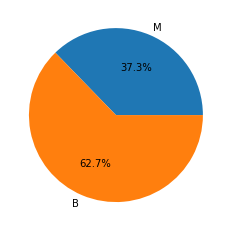

In [36]:
# === Summary Statistics ===
print("\nClass Distribution:")
print(Counter(Target))

# === Visualization === 
ClassDir = Counter(Target)              # Counter calculates occurrences of each class [5]
y = np.array(list(ClassDir.values()))       # Converting ClassDir to NumPy array for plotting
labels = list(ClassDir.keys())              # Extract the class labels from the counter
plt.pie(y,                                  # Create a pie char [6]
        labels=labels, 
        autopct='%1.1f%%');    

#### Step 9 : Visualizing Features using Bar plot

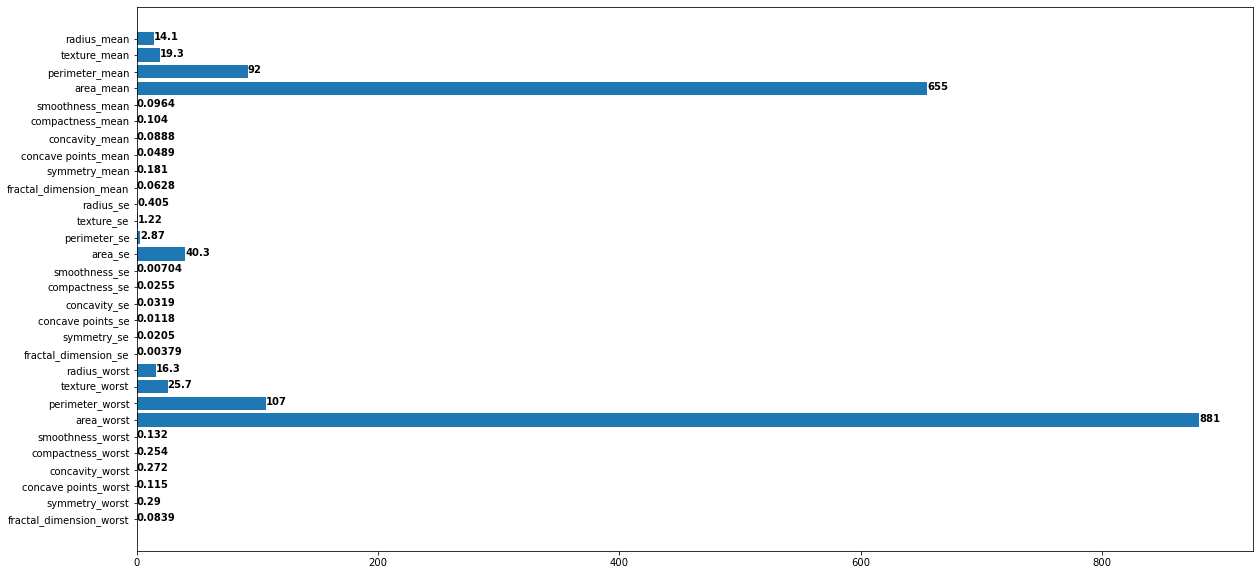

In [37]:
# --- Visualization before scaling ---
FeatureMean = Features.mean().to_dict()                          # Create a dictionary with features as keys and their means as values
fig, ax = plt.subplots(figsize=(20,10))                             # Create a horizontal bar chart with a figure size of 20x10
ax.barh(list(FeatureMean.keys()), list(FeatureMean.values()))       # Plot the feature names on the y-axis and their mean values on the x-axis
ax.invert_yaxis()                                                   # Invert the y-axis so that the bars are ordered from top to bottom
for values in ax.patches:
    plt.text(                                                       # Add labels to each bar in the chart
             s=f'{values.get_width():.3g}' if        
             values.get_width()            
             < 1000 else f'{values.get_width():.6g}',
             x=values.get_width(),
             y=values.get_y()+0.5,
             fontsize=10,
             fontweight ='bold')

#### Step 10 : Applying StandardScalar

In [38]:
scaler = StandardScaler()
SSFeatures = scaler.fit_transform(Features)                           # Apply the scaler to the feature data and transform it to standardized values
SSFeatures = pd.DataFrame(SSFeatures, columns=Features.columns)        # Converting to pandas dataframe

#### Step 11 : Visualize Features After Standard Scaling

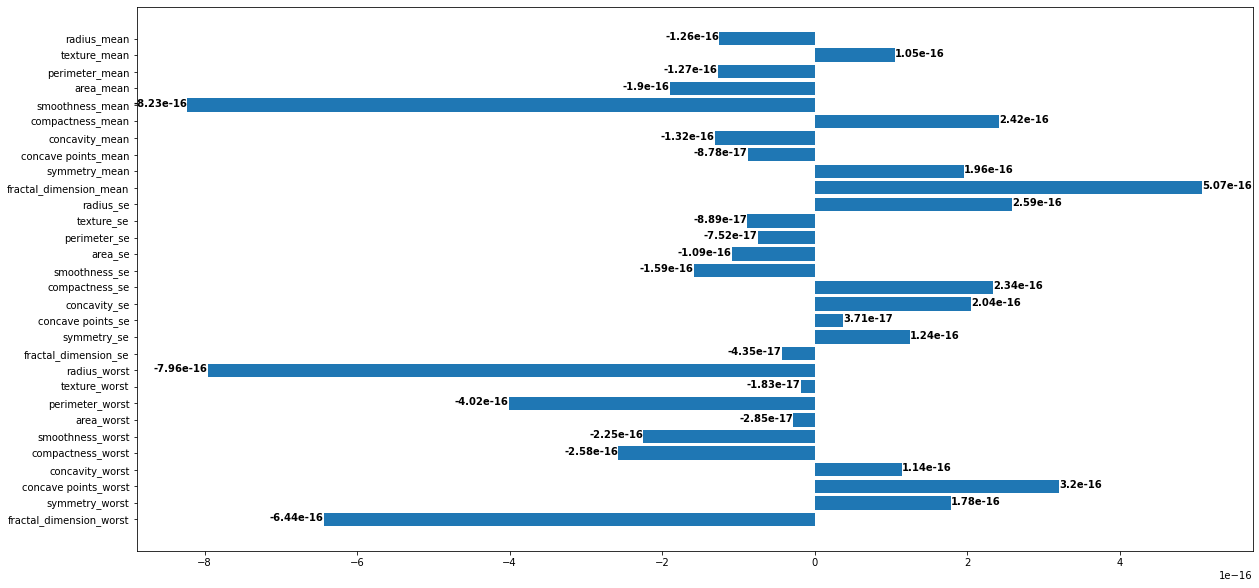

In [39]:
# --- Visualize after Standard Scaling ---
FeatureMean = SSFeatures.mean().to_dict()                        # Create a dictionary with features as keys and their means as  [7]
fig, ax = plt.subplots(figsize=(20,10))                             # Create a horizontal bar chart with a figure size of 20x10
ax.barh(list(FeatureMean.keys()), list(FeatureMean.values()))       # Plot the feature names on the y-axis and their mean values on the x-axis 
ax.invert_yaxis()                                                   # Invert the y-axis so that the bars are ordered from top to bottom 
for values in ax.patches:
    plt.text(s=f'{values.get_width():.3g}',                         # Add labels to each bar in the chart [8]
             x=values.get_width(),
             y=values.get_y()+0.5,
             fontsize=10,
             fontweight ='bold',
             ha='right' if values.get_width() < 0 else 'left')

#### Step 12: Visualize Feature Correlation before PCA

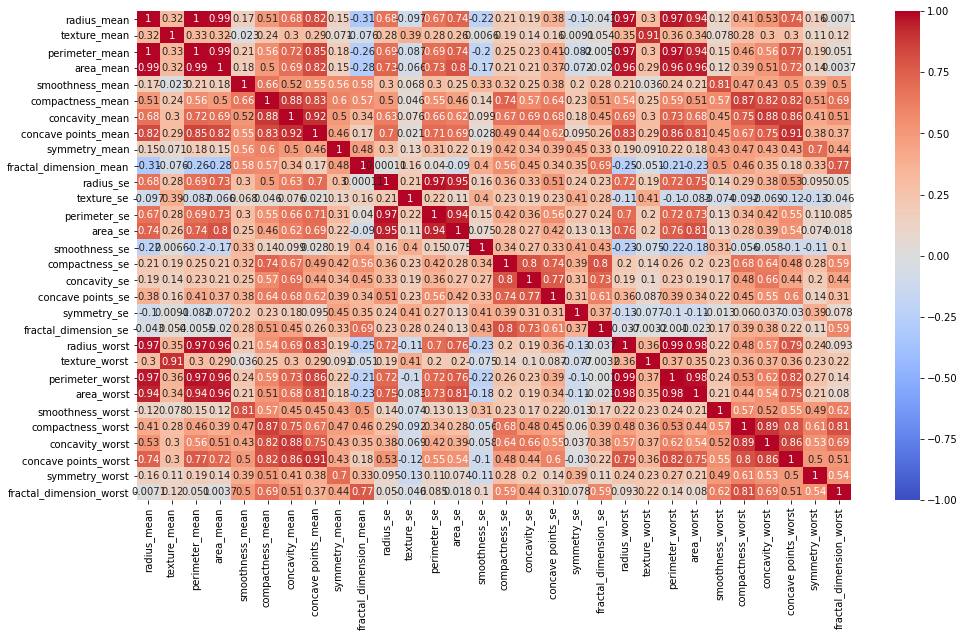

In [40]:
plt.figure(figsize=(16, 9))             # Create a figure with a specified size of 16x9 for the heatmap
sns.heatmap(SSFeatures.corr(),       # Plot a heatmap of the correlation matrix for the standardized feature data [9]
            cmap='coolwarm', 
            annot=True, 
            vmin=-1, 
            vmax=1)
plt.show()  

#### Step 13: Apply PCA

In [46]:
PCAnalysis = PCA(n_components=15)                                    # Initialize PCA to reduce the data to 8 principal components
SSAndPCAFeatureData = PCAnalysis.fit_transform(SSFeatures)           # Fit and transform the standardized feature data using PCA, reducing dimensionality [10]
print("Total Variance Explained:", np.sum(PCAnalysis.explained_variance_ratio_))

Total Variance Explained: 0.9864881227140345


#### Step 14: Visualize Feature Correlation After PCA

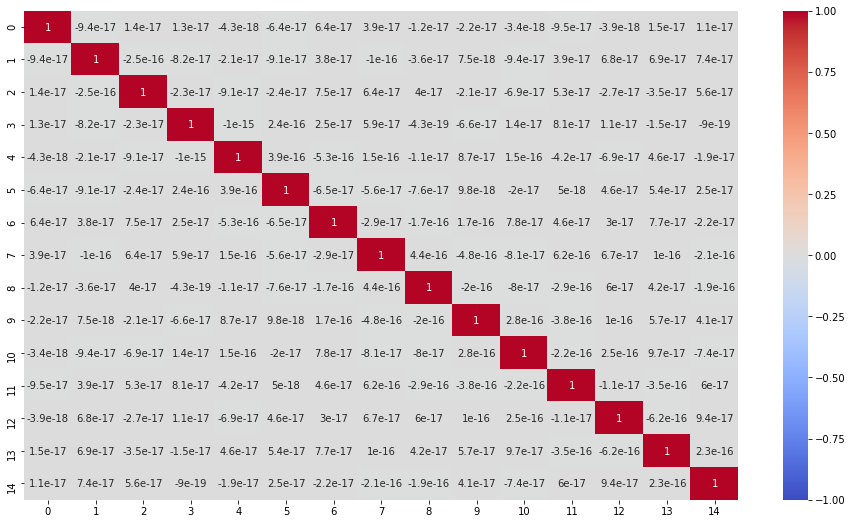

In [47]:
plt.figure(figsize=(16, 9))                                 # Create a figure with a specified size of 16x9 for the heatmap
sns.heatmap(pd.DataFrame(SSAndPCAFeatureData).corr(),       # Plot a heatmap of the correlation matrix for the standardized feature data [9]
            cmap='coolwarm', 
            annot=True, 
            vmin=-1, 
            vmax=1)
plt.show()  

#### Step 15: Visualizing 2D PCA

The explained variance of ~63% means that the first two principal components together account for ~63% of the total variability in the dataset. This indicates that while some important structure and class separation are preserved, about ~37% of the variance is lost, suggesting that additional components may contain meaningful information not captured in this 2D view. Nonetheless, it provides a useful visual summary of the data’s underlying patterns and class relationships.

Total Variance Explained: 0.6324320765155947


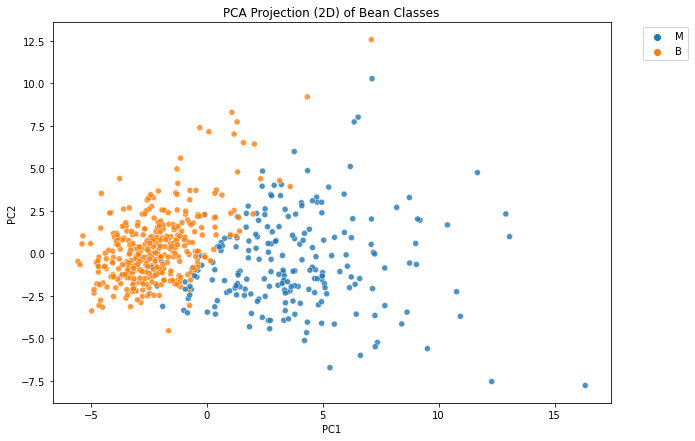

In [59]:
pca = PCA(n_components=2)     # Initialize PCA to reduce the data to 2 principal components
X_pca = pca.fit_transform(SSFeatures)    # Fit and transform the standardized feature data using PCA, reducing dimensionality [10]
print("Total Variance Explained:", np.sum(pca.explained_variance_ratio_))

# === Plot the data === #
plt.figure(figsize=(10, 7))     # Create a figure with specified size
sns.scatterplot(                # Create a scatter plot of the first two principal components from PCA [11]
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=Dataset["diagnosis"],
    palette="tab10", alpha=0.8
)
plt.title("PCA Projection (2D) of Bean Classes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

#### Step 16: Encoding the labels

In [64]:
Encoder = LabelEncoder()                                # Initialize a LabelEncoder to convert categorical target labels into numeric values
Encoded_Target = Encoder.fit_transform(Target)        # Fit the encoder to the target data and transform the labels into numeric values [12]
for Idx, LabelName in enumerate(Encoder.classes_):      
    print(f'{LabelName}: {Idx}')

B: 0
M: 1


#### Step 17: Split the dataset into Train and Test sets

In [65]:
xTrain, xTest, yTrain, yTest = train_test_split(SSFeatures, Encoded_Target, test_size=0.3, random_state=42) #[13]

#### Step 18: Intialize the Model

In [66]:
#Inittialize the Model
Model = svm.SVC() #[14]

#### Step 19: Parameter search

In [67]:
ParameterGrid = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
    'C':[0.1, 1, 3, 5] 
}

GridSearch = GridSearchCV(Model, ParameterGrid, verbose=4) #[15]

# Fits dataset parameters
GridSearch.fit(xTrain, yTrain)

print("Best Model Parameters: ", GridSearch.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END .............................C=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END .............................C=0.1, kernel=poly; total time=   0.0s
[CV 3/5] END .............................C=0.1, kernel=poly; total time=   0.0s
[CV 4/5] END .............................C=0.1, kernel=poly; total time=   0.0s
[CV 5/5] END .............................C=0.1, kernel=poly; total time=   0.0s
[CV 1/5] END ..............................C=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..............................C=0.1

In [68]:
for score, params in zip(GridSearch.cv_results_['mean_test_score'], GridSearch.cv_results_['params']):      # Visualize the mean test scores and their corresponding parameters [16]
    print(f"C={params['C']:<6} | kernel={ params['kernel']:<8} | {score:.10f}")

C=0.1    | kernel=linear   | 0.9723101266
C=0.1    | kernel=poly     | 0.8266772152
C=0.1    | kernel=rbf      | 0.9396835443
C=0.1    | kernel=sigmoid  | 0.9446835443
C=1      | kernel=linear   | 0.9748101266
C=1      | kernel=poly     | 0.8944936709
C=1      | kernel=rbf      | 0.9672784810
C=1      | kernel=sigmoid  | 0.9522151899
C=3      | kernel=linear   | 0.9723101266
C=3      | kernel=poly     | 0.9195253165
C=3      | kernel=rbf      | 0.9723417722
C=3      | kernel=sigmoid  | 0.9346202532
C=5      | kernel=linear   | 0.9698101266
C=5      | kernel=poly     | 0.9421518987
C=5      | kernel=rbf      | 0.9723101266
C=5      | kernel=sigmoid  | 0.9271202532


#### Step 20: Compute Accuracy

In [69]:
#Calculate Accuracy
BestModel = GridSearch.best_estimator_                      # Retrieve the best model from the grid search [17]
Predictions = BestModel.predict(xTest)                      # Use the best model to make predictions on the test data
Predictions = Encoder.inverse_transform(Predictions)        # Convert the predicted numeric labels back to their original categorical form 
yTest = Encoder.inverse_transform(yTest)                    # Convert the true test labels back to their original categorical form [18]
Accuracy = accuracy_score(Predictions, yTest)               # Calculate the accuracy by comparing predictions with the true test labels [17]
print("Model Accuracy: ", Accuracy)

Model Accuracy:  0.9766081871345029


#### Step 21: Generate Confusion Matrix

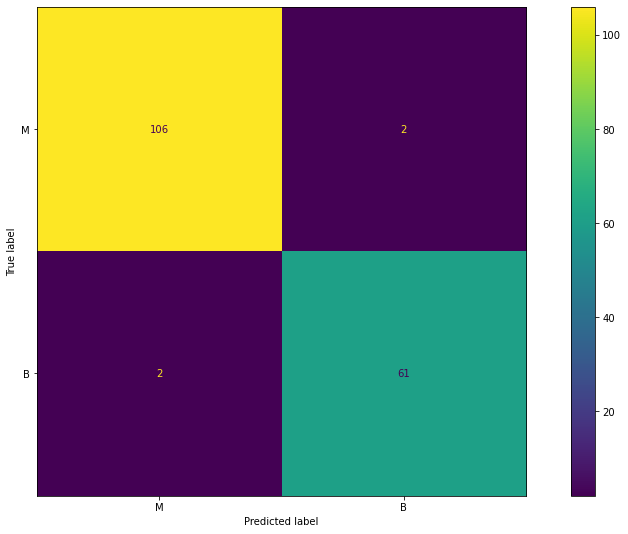

In [70]:
ConfusionMatrix = confusion_matrix(Predictions, yTest)      # Generate the confusion matrix by comparing predictions with the true test labels
Display = ConfusionMatrixDisplay(ConfusionMatrix,           # Create a confusion matrix display with the original class labels [19]
                                 display_labels=labels)          
Fig, Ax = plt.subplots(figsize=(16, 9))                     # Create a figure with a specified size of 16x9 for the confusion matrix plot
Display.plot(ax=Ax);  

#### References
[1] https://www.geeksforgeeks.org/reading-excel-file-using-python/ <br>
[2] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html <br>
[3] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html <br>
[4] https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe <br>
[5] https://www.geeksforgeeks.org/python-counter-objects-elements/ <br>
[6] https://www.w3schools.com/python/matplotlib_pie_charts.asp <br>
[7] https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean <br>
[8] https://www.geeksforgeeks.org/bar-plot-in-matplotlib/ <br>
[9] https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/ <br>
[10] https://www.geeksforgeeks.org/principal-component-analysis-with-python/ <br>
[11] https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html/ <br>
[12] https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/ <br>
[13] https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/ <br>
[14] https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html <br>
[15] https://www.geeksforgeeks.org/daskgridsearchcv-a-competitor-for-gridsearchcv/ <br>
[16] https://stackoverflow.com/questions/63584320/print-parameters-and-scores-gridsearchcv <br>
[17] https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html <br>
[18] https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.accuracy_score.html <br>
[19] https://www.w3schools.com/python/python_ml_confusion_matrix.asp <br>
[20] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html <br>
[21] https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data <br>

#### Authors
1) Shivangi Gupta (s1gupta@odu.edu)
2) Suzanne T Parete-Koon (paretekoonst@ornl.gov)
